In [2]:
pip install tensorflow

  Using cached tensorflow-2.13.0-cp39-cp39-win_amd64.whl (1.9 kB)
     -------------------------------------- 276.5/276.5 MB 2.6 MB/s eta 0:00:00
     -------------------------------------- 430.5/430.5 kB 2.2 MB/s eta 0:00:00
     ---------------------------------------- 4.3/4.3 MB 2.3 MB/s eta 0:00:00
  Using cached flatbuffers-23.5.26-py2.py3-none-any.whl (26 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached tensorboard-2.13.0-py3-none-any.whl (5.6 MB)
  Using cached absl_py-1.4.0-py3-none-any.whl (126 kB)
     ---------------------------------------- 14.9/14.9 MB 2.5 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 2.3 MB/s eta 0:00:00
  Using cached keras-2.13.1-py3-none-any.whl (1.7 MB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached libclang-16.0.6-py2.py3-none-win_amd64.whl (24.4 MB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using 

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.6.0 requires daal==2021.4.0, which is not installed.
numba 0.55.1 requires numpy<1.22,>=1.18, but you have numpy 1.24.3 which is incompatible.


In [4]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [5]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data() #Loading the mnist dataset into X_train,y_train & X_test,y_test
len(X_train)

11490434/11490434 [==============================] - 3s 0us/step


60000

In [6]:
len(y_train)

60000

In [7]:
len(X_test)

10000

In [8]:
X_train[0].shape   #Checking the dimensions of the first image of the X_train and the image contains 28 rows and 28 columns

(28, 28)

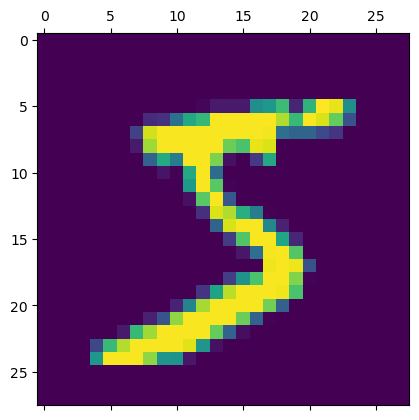

In [9]:
plt.matshow(X_train[0])   # Visual Representation of first image of X_train using matshow

In [10]:
X_train=X_train/255   #Changing the range of pixel intensity values, earlier which was from 0 to 255 to 0 to 1.
X_test=X_test/255    #Similar process was not carried out for y_train and y_test because they consist values of 0 to 9 as output

In [11]:
X_train_flattened=X_train.reshape(len(X_train),28*28)  #Flattening(conversion from 2d pixel array to 1d using .reshape with len(X_train),28*28 as parameters) here the input image has 28*28 pixels.
X_test_flattened=X_test.reshape(len(X_test),28*28)

In [12]:
X_train_flattened.shape

(60000, 784)

In [14]:
model1=keras.Sequential([keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')]) #.Sequential is used to create a model with 10 being the number of output nodes and the activaton function for the output is sigmoid.

In [15]:
model1.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [19]:
model1.fit(X_train_flattened,y_train,epochs=5)  #Fitting using.compile and X_train_flattened and y_train and epoch as parameters. One complete forward and backward pass of the data is called an epoch

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4680 - accuracy: 0.8769
Epoch 2/5
1875/1875 [==============================] - 2s 920us/step - loss: 0.3039 - accuracy: 0.9156
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2836 - accuracy: 0.9208
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2732 - accuracy: 0.9237
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2667 - accuracy: 0.9254


In [20]:
model1.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.2663 - accuracy: 0.9247


[0.26626595854759216, 0.9247000217437744]

In [21]:
predicted=model1.predict(X_test_flattened)
predicted[0]   #in the output we get the values of probability of a number i.e 9.99694467e is the value for output digit 7 Since this value is the greatest our model has predicted the digit to be '7'.

313/313 [==============================] - 0s 580us/step


array([1.92828048e-02, 4.59449211e-07, 6.57109544e-02, 9.51442182e-01,
       2.47526728e-03, 1.40708461e-01, 1.29575642e-06, 9.99694467e-01,
       1.11489914e-01, 6.45012677e-01], dtype=float32)

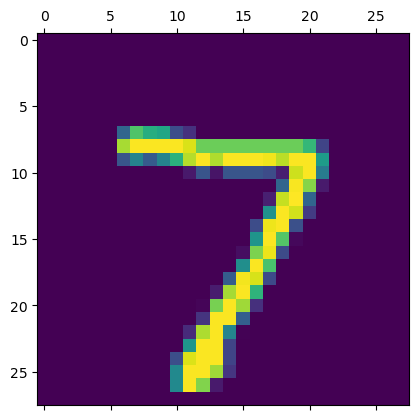

In [22]:
plt.matshow(X_test[0])   #Visual representation of the predicted output

In [23]:
import numpy as np
np.argmax(predicted[0])   #Simpler way to find out the output using.argmax

7

In [24]:
import numpy as np
np.argmax(predicted[1])

2

In [25]:
import numpy as np
np.argmax(predicted[2])

1

In [26]:
model2=keras.Sequential([
    keras.layers.Dense(300,input_shape=(784,),activation='relu'),keras.layers.Dense(10,activation='sigmoid')
])    #Using a hidden layer where 300 represents the number of nodes/neurons in the hidden layer and then the output layer is defined.

In [27]:
model2.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [28]:
model2.fit(X_train_flattened,y_train,epochs=5)
model2.evaluate(X_test_flattened,y_test)

Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2191 - accuracy: 0.9359
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0888 - accuracy: 0.9729
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0579 - accuracy: 0.9820
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0420 - accuracy: 0.9869
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.0768 - accuracy: 0.9773


[0.0767667144536972, 0.9772999882698059]

In [ ]:
#In the above cell we can see that after using one hidden layer the accuracy improves from 0.9254(without hidden layer) to 0.9773(after using one hidden layer)